<a href="https://colab.research.google.com/github/EgorMatveev26/Datasets/blob/main/%D0%9B%D0%A0_3_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание датасета
Используемый набор данных содержит информацию об успеваемости учащихся, предназначенный для изучения факторов, влияющих на академическую успеваемость учащихся. Набор данных состоит из 10 000 записей, где каждая строка представляет отдельного ученика, а столбцы содержат следующие переменные:
- **Hours Studied**: Общее количество часов, потраченных на учебу каждым учащимся
- **Previous Scores**: Баллы, полученные учащимися в ходе предыдущих тестов
- **Extracurricular Activities**: Участвует ли учащийся во внеклассных мероприятиях (да или нет)
- **Sleep Hours**: Среднее количество часов сна учащегося в течение дня
- **Sample Question Papers Practiced**: Количество отработанных контрольных работ
- **Performance Index**: Показатель общей успеваемости каждого учащегося.Индекс варьируется от 10 до 100, причем более высокие значения указывают на лучшую успеваемость.

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [4]:
# Читаем датасет
dataset = pd.read_csv('Student_Performance.csv', sep=',')

In [5]:
# Выводим первые 5 строк
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
# Проверка на отсутствующие значения
print(dataset.isnull().sum())
# Удаление строк с пропущенными значениями, если они есть
dataset.dropna(inplace=True)

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [7]:
# Выводим информацию о датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
# Заменяем бинарные переменные на 0 и 1
dataset = dataset.replace('No', 0).replace('Yes', 1)

In [9]:
# Проверим, что столбцы object отсутствуют
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


Text(0.5, 1.0, 'Корреляция Пирсона')

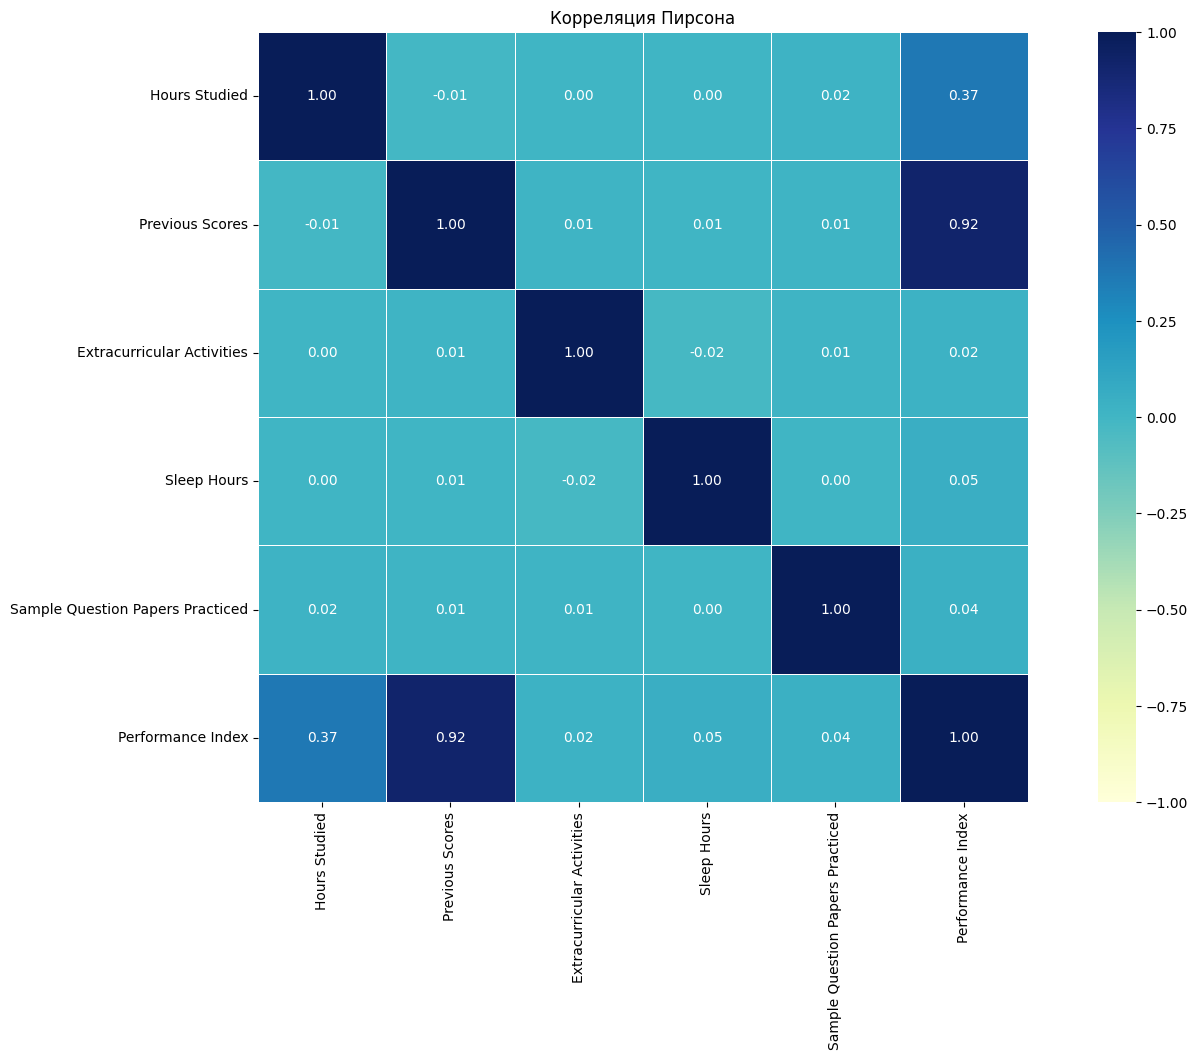

In [10]:
# Вычисляем матрицу корреляций
corr_matrix = dataset.copy()
plt.figure(figsize=(18,10),dpi=100)

corr_matrix = corr_matrix.corr(method="pearson",numeric_only = True)
# Визуализируем матрицу корреляции
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("Корреляция Пирсона")

In [11]:
# выведем названия столбцов
print(dataset.columns)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


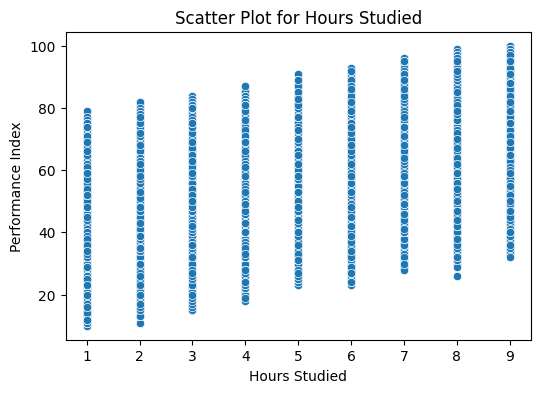

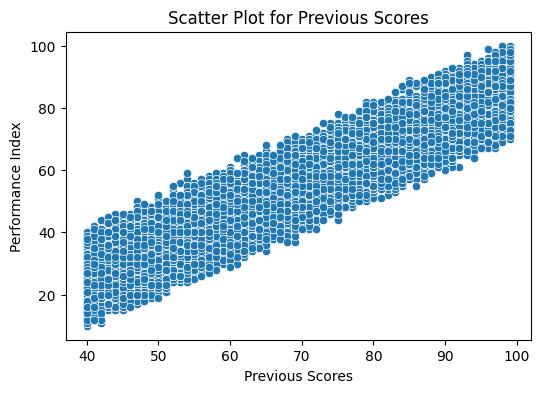

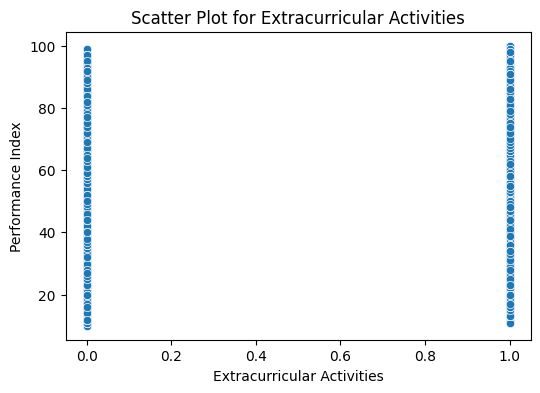

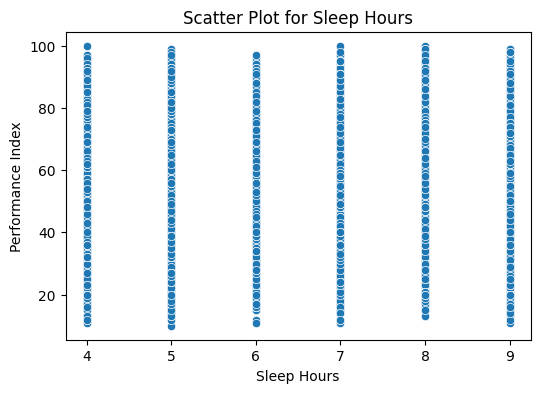

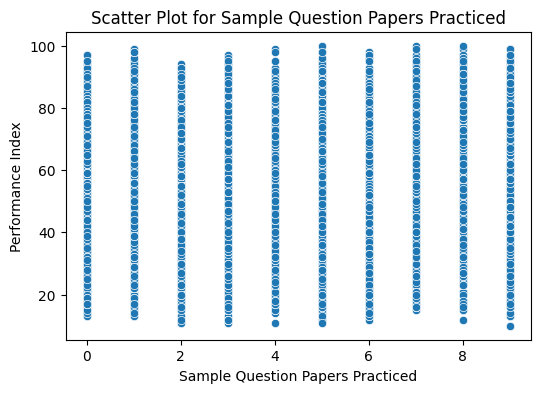

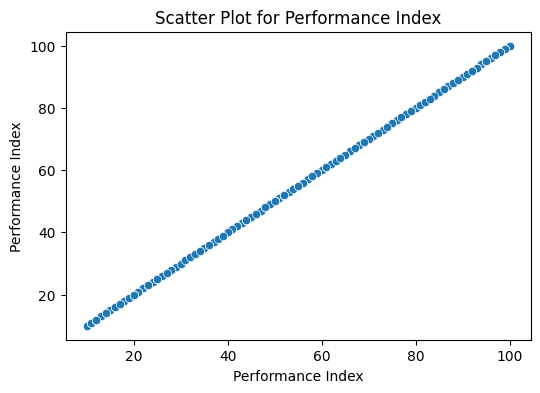

In [12]:
# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной

# Фильтрация числовых столбцов для построения диаграмм рассеяния
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Построение диаграмм рассеяния для каждого столбца
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=dataset, x=col, y='Performance Index')  # y можно заменить другим столбцом, если не известно
    plt.title(f'Scatter Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Performance Index')  # Замените на целевой столбец, если он известен
    plt.show()

In [13]:
# подготавливаем датасет к обучению

X = dataset.drop(['Performance Index'], axis=1)
y = dataset['Performance Index']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (10000, 5) | y shape: (10000,) 


In [14]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

# Линейная регрессия

In [15]:
from sklearn.linear_model import LinearRegression

# Создаем модель линейной регрессии
modelLR = LinearRegression()

# Приводим модель в соответствие с данными
modelLR.fit(X_train, y_train)

# Предсказываем реакцию для новой точки данных
y_pr_LR = modelLR.predict(X_test)

In [16]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  2.0539
  R2: 0.9887
 Adjusted R2: 0.9887
 Cross Validated R2: 0.9887


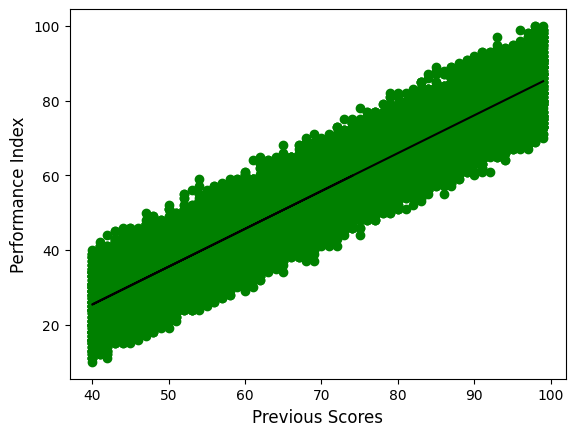

In [17]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dataset['Previous Scores'].values[:,np.newaxis]
y2 = dataset['Performance Index'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Performance Index', size=12)
plt.xlabel('Previous Scores', size=12)
plt.show()

Точки данных, обозначенные зелёным цветом, сгруппированы вдоль диагонали, что указывает на положительную корреляцию между предыдущими оценками и индексом производительности. Линия тренда (черная линия) проходит через эту область, подтверждая положительную линейную зависимость.

# Полиномиальная регрессия

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [21]:
# Создаем модель линейной регрессии
modelPR = LinearRegression()

# Приводим модель в соответствие с данными
modelPR.fit(X_p_train, y_p_train)

# Предсказываем реакцию для новой точки данных
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  2.0186
  R2: 0.989
 Adjusted R2: 0.9888
 Cross Validated R2: 0.9885


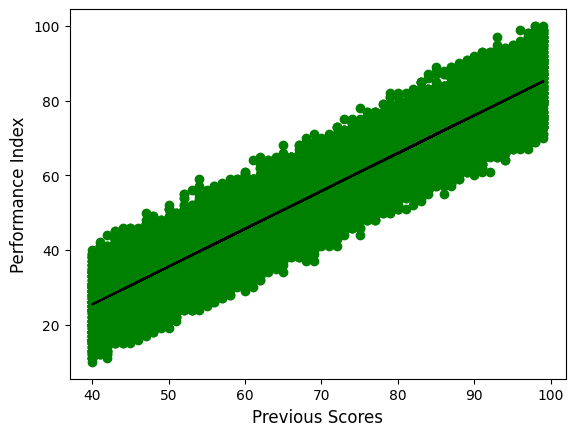

In [22]:
X2 = dataset['Previous Scores'].values[:,np.newaxis]
y2 = dataset['Performance Index'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Performance Index', size=12)
plt.xlabel('Previous Scores', size=12)
plt.show()

## Регрессия дерева принятия решений

Дерево решений является самым мощным и популярным инструментом для классификации и прогнозирования. Дерево принятия решений представляет собой древовидную структуру, похожую на блок-схему, где каждый внутренний узел обозначает тест по атрибуту, каждая ветвь представляет результат теста, а каждый конечный узел (терминальный узел) содержит метку класса. Существует непараметрический метод, используемый для моделирования дерева решений для прогнозирования непрерывного результата.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Создаем пошаговую регрессионную модель
modelDT = DecisionTreeRegressor()

# Приводим модель в соответствие с данными
modelDT.fit(X_train, y_train)

y_dt_pred = modelDT.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  3.0534
  R2: 0.9751
 Adjusted R2: 0.975
 Cross Validated R2: 0.9746


In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=100)

modelRF.fit(X_train, y_train)

y_rf_pred = modelRF.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  2.3555
  R2: 0.9852
 Adjusted R2: 0.9851
 Cross Validated R2: 0.9852


## Регрессия опорных векторов (SVR)
Регрессия опорных векторов (SVR) — это тип метода опорных векторов (SVM), который используется для задач регрессии. Он пытается найти функцию, которая наилучшим образом предсказывает непрерывное выходное значение для заданного входного значения.

SVR может использовать как линейные, так и нелинейные ядра. Линейное ядро — это простое скалярное произведение между двумя входными векторами, в то время как нелинейное ядро — это более сложная функция, которая может захватывать более сложные закономерности в данных. Выбор ядра зависит от характеристик данных и сложности задачи.

В пакете scikit-learn для Python вы можете использовать класс 'SVR' для выполнения SVR с линейным или нелинейным 'ядром'. Чтобы указать ядро, вы можете установить параметр ядра в 'linear' или 'RBF' (радиальная базисная функция).

Метод опорных векторов (SVM) — это алгоритм контролируемого обучения, который может быть использован для задач классификации или регрессии. SVM пытаются найти гиперплоскость в многомерном пространстве, которое максимально разделяет различные классы или выходные значения.

Ядра: SVR может использовать различные типы ядер, которые представляют собой функции, определяющие сходство между входными векторами. Линейное ядро — это простое скалярное произведение между двумя входными векторами, в то время как нелинейное ядро — это более сложная функция, которая может захватывать более сложные закономерности в данных. Выбор ядра зависит от характеристик данных и сложности задачи.

Гиперпараметры: SVR имеет несколько гиперпараметров, которые можно настроить для управления поведением модели. Например, параметр 'C' управляет компромиссом между нечувствительными потерями и чувствительными потерями. Большее значение 'C' означает, что модель будет пытаться свести к минимуму нечувствительные потери в большей степени, в то время как меньшее значение C означает, что модель будет более снисходительной в отношении допускать большие ошибки.

Оценка модели: Как и в случае с любой моделью машинного обучения, важно оценить производительность модели SVR. Одним из распространенных способов сделать это является разделение данных на обучающий и тестовый наборы и использование обучающего набора в соответствии с моделью и тестового набора для ее оценки. Затем вы можете использовать такие метрики, как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE), чтобы измерить ошибку между прогнозируемыми и истинными выходными значениями.

In [ ]:
from sklearn.svm import SVR

# Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)


RMSE:  4.8709
  R2: 0.9365
 Adjusted R2: 0.9364
 Cross Validated R2: 0.9363


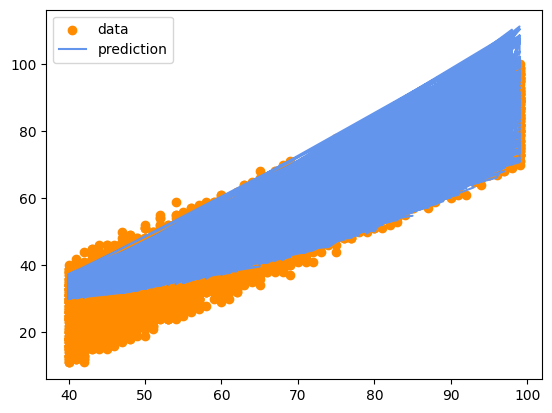

In [ ]:
plt.scatter(X_train["Previous Scores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Previous Scores"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
# Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  2.3475
  R2: 0.9853
 Adjusted R2: 0.9852
 Cross Validated R2: 0.9848


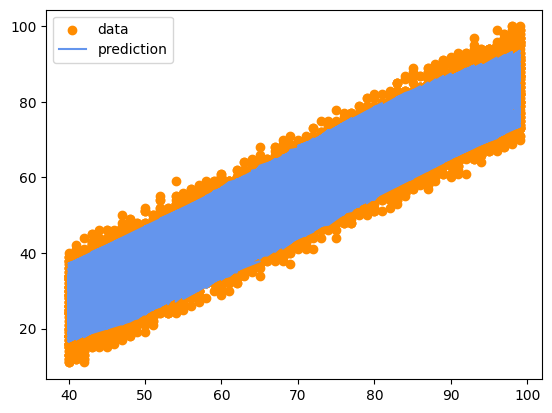

In [ ]:
plt.scatter(X_train["Previous Scores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Previous Scores"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()


## Эластичная сеть

In [ ]:
from sklearn.linear_model import ElasticNet

modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

modelEN.fit(X_train, y_train)

y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  2.0677
  R2: 0.9886
 Adjusted R2: 0.9885
 Cross Validated R2: 0.9886


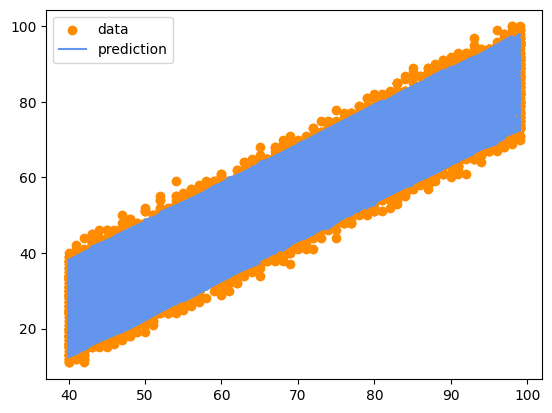

In [ ]:
plt.scatter(X_train["Previous Scores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Previous Scores"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()